# Home work 9 - Advanced Data Analysis
## Laplacian-regularized least squares by using the Gaussian kernel model.

In [159]:
import numpy as np; import matplotlib
import matplotlib.pyplot as plt
np.random.seed(1)

# Generate Data

In [160]:
def generate_data(n=200):
    x = np.linspace(0, np.pi, n // 2)
    u = np.stack([np.cos(x) + .5, -np.sin(x)], axis=1) * 10.
    u += np.random.normal(size=u.shape)
    v = np.stack([np.cos(x) - .5, np.sin(x)], axis=1) * 10.
    v += np.random.normal(size=v.shape)
    x = np.concatenate([u, v], axis=0)
    y = np.zeros(n)
    y[0] = 1
    y[-1] = -1
    return x, y

# Implement LRLS

In [161]:
def lrls(x, y, h=1., l=1., nu=1.):
    """
    :param x: data points
    :param y: labels of data points
    :param h: width parameter of the Gaussian kernel
    :param l: weight decay
    :param nu: Laplace regularization
    :return:
    """

    # Implement this function
    n = x.shape[0]
    # Calculate Distances
    x_sq = np.sum((x[None] - x[:, None])**2,axis=2)
    K = np.exp(- x_sq  / (2 * h ** 2))
    # Set Weighting matrix
    W = K
    # Compute diagonal matrix
    d = np.diag(np.sum(W,axis=0))

    L = d - W # Compute Laplacian
    
    # Compute prediction
    prediction = np.linalg.solve(K ** 2 + l * np.eye(n) + 2 * nu * K.T @ L @ K, K.T @ y)

    return prediction

# Visualize Data

<Figure size 432x288 with 0 Axes>

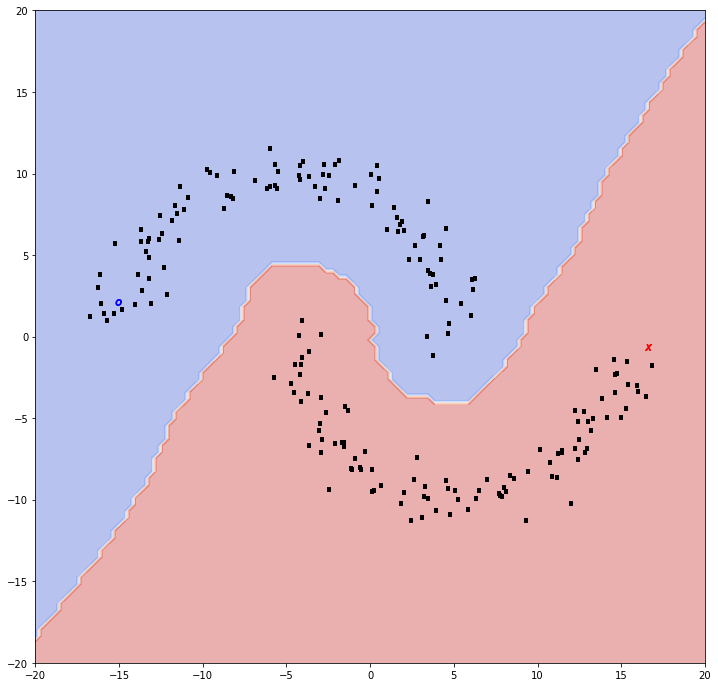

In [162]:
def visualize(x, y, theta, h=1.):
    plt.clf()
    plt.figure(figsize=(12, 12))
    plt.xlim(-20., 20.)
    plt.ylim(-20., 20.)
    grid_size = 100
    grid = np.linspace(-20., 20., grid_size)
    X, Y = np.meshgrid(grid, grid)
    mesh_grid = np.stack([np.ravel(X), np.ravel(Y)], axis=1)
    k = np.exp(-np.sum((x.astype(np.float32)[:, None] - mesh_grid.astype(
    np.float32)[None]) ** 2, axis=2).astype(np.float64) / (2 * h ** 2))
    plt.contourf(X, Y, np.reshape(np.sign(k.T.dot(theta)),
    (grid_size, grid_size)),
    alpha=.4, cmap=plt.cm.coolwarm)
    plt.scatter(x[y == 0][:, 0], x[y == 0][:, 1], marker='$.$', c='black')
    plt.scatter(x[y == 1][:, 0], x[y == 1][:, 1], marker='$X$', c='red')
    plt.scatter(x[y == -1][:, 0], x[y == -1][:, 1], marker='$O$', c='blue')
    # plt.savefig(‘homework.png')

x, y = generate_data(n=200)
theta = lrls(x, y, h=1.)
visualize(x, y, theta)